In [1]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 디렉토리 설정
import os
os.chdir('/content/drive/MyDrive/PyStat')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 객체 내용/타입 출력
def printobj(*a):
    for x in a:
        display(x)
        print('\n', type(x), '\n')

# 추론 통계

추론 통계(inferential statistics) : 수집한 데이터를 바탕으로 추론, 예측하는 통계 기법
- 모집단/표본
- 확률변수
- 확률분포
- 표본분포
- 추정/검정

## CHAP 4. 추론통계의 기본

- 2장과 3장

- 지표화 / 시각화 $→$ 강력한 도구

- 대규모 데이터가의 통계적 성질

- 시나리오

> 어느 고등학교에서 전교생 400명이 수학 시험을 동일하게 치렀다. 3학년인 A 학생은 이 시험에서 80점을 받았지만, 학교에서 전교생의 평균 점수를 알려주지 않았기 때문에 A 학생은 자신이 전교생 중 어느 정도의 수준인지 알지 못한다. 자신의 성적이 좋은지 나쁜지가 궁금한 A 학생은 스스로 전교생의 평균 점수를 구해보려고 했지만, 400명 전원의 시험 결과를 수소문하는 것은 무리였다. 그래서 A 학생은 학교 안에서 우연히 만난 20명에게 시험 점수를 물어보고, 그 결과로부터 전교생의 평균 점수를 추측하기로 했다.
>
> 20명의 시험 점수 평균은 70.4점 이었다. A 학생은 전교생의 평균도 그 정도일 것으로 생각하고, 자신의 점수가 평균보다 위에 있다는 것에 만족했다.

- **추론통계** vs **기술통계**

- 마지막 부분
  - 통계량 계산
  - 모수 추정
  - 의사결정·조치

- 라이브러리 / 데이터

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 소수점 이하 3자리까지 출력
%precision 3
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3, suppress=True)

# 그래프가 Jupyter Notebook 위에 표시되도록 설정
%matplotlib inline

- ch4_scores400.csv

In [4]:
# 작업 디렉토리 아래 data 폴더에 있는 csv 파일을 읽어 들여 DataFrame 자료구조로 저장한다.
df = pd.read_csv('data/ch4_scores400.csv')
scores = np.array(df['score'])
printobj(scores[:10])

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])


 <class 'numpy.ndarray'> 



### 4-1. 모집단과 표본

#### 1) 기본 개념

- 추론통계

- **모집단**(population) / **표본**(sample)

- **표본추출**(sampling) / **표본크기**(sample size)

- **표본통계량**(sample statistic) / **모수**(parameter)

- **표본평균**(sample mean) / **모평균**(population mean)

- 정리하면

<br>

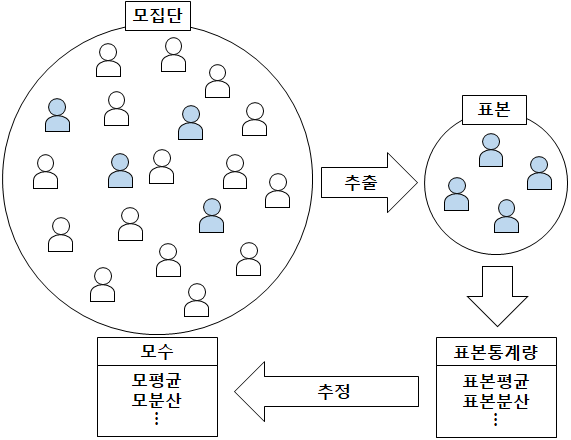

[그림 4-1] 모집단과 표본

- 400명 점수 / 우연히 만난 학생 20명 점수

- 표본평균 / 모평균

- **추정량**(estimator) / **추정값**(estimate)

- 모평균 추정값 70.4점

#### 2) 표본추출 방법

- 우연히 만난 20명의 점수

- 친한 친구 20명의 점수 ?

- A 학생이 친구 20명에게 표본을 얻었다면

- 같은 동아리의 여러 학년이라도

- 평균 점수를 잘 추측하려면

- '우연히 만나는' $→$ **무작위추출**(random sampling)

- 편향이 생길 수도

- 다시 하면 No

- 편향된 표본도 감안

- 같은 사람이 여러 번

- **복원추출**(sampling with replacement) / **비복원추출**(sampling without replacement)

- 파이썬 무작위추출
  - np.random.choice()

- [1, 2, 3] $→$ 3개

In [5]:
np.random.choice([1, 2, 3], 3)

array([3, 3, 2])

- 실행할 때마다 다른 결과

- 같은 숫자 여러 번 (복원추출)

- 비복원추출 $→$ 인자 'replace=False'

In [6]:
np.random.choice([1, 2, 3], 3, replace=False)

array([3, 1, 2])

- 한 번씩 추출

- 사람마다 계산 결과 다름

- 난수 시드

- 시드 $=0$

In [7]:
np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

- 계산 결과의 재현성

- scores에서 표본크기 20의 복원추출

- 표본평균 계산

In [8]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
printobj(sample, sample.mean())

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81])


 <class 'numpy.ndarray'> 



70.4


 <class 'numpy.float64'> 



- 모평균 계산

In [9]:
printobj(scores.mean())

69.53


 <class 'numpy.float64'> 



- $69.53 ≃ 70.4$

- 무작위추출

In [10]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위추출로 얻은 표본평균', sample.mean())

1번째 무작위추출로 얻은 표본평균 72.45
2번째 무작위추출로 얻은 표본평균 63.7
3번째 무작위추출로 얻은 표본평균 66.05
4번째 무작위추출로 얻은 표본평균 71.7
5번째 무작위추출로 얻은 표본평균 74.15


- 70점 전후

### 4-2. 확률 모형

- 무작위추출

- **확률**(probability)

- **확률 모형**(probability model)

- 주사위

#### 1) 확률의 기본

- 주사위 굴릴 때


- **확률변수**(random variable)
  - 취할 수 있는 값
  - 그 값이 나올 확률

- 주사위 굴리면

- **시행**(trial) / **실현값**(realization)

- **사건**(event) / **근원사건**(elementary event)

- 사건에 대응하여 확률 정의

- 확률의 수식 표현

$$
P(X=1) = \frac{1}{6}
\tag{4-1}
$$

- '눈이 홀수'인 사건

$$
\begin{align}
P\{(X=1) ∪ (X=3) ∪ (X=5)\}
&= P(X=1) + P(X=3) + P(X=5) \\\\
&= \frac{1}{6} + \frac{1}{6} + \frac{1}{6} \\\\
&= \frac{1}{2}
\end{align}
\tag{4-2}
$$

- 식(4-2)의 첫째 줄

- 배반사건의 확률의 합

- **상호배반**(mutually exclusive)

- 예를 들어

- 상호배반이 아닌 예

- '눈이 홀수'인 확률 $=\frac{1}{2}$인 이유

#### 2) 확률분포

- 확률변수
  - 취할 수 있는 값과
  - 그 값이 나올 확률이 결정된 변수

- **확률분포**(probability distribution)
  - '취할 수 있는 값'과
  - '그 값이 나올 확률'을 서로 대응·연결시켜 주는 역할
    - 확률변수 만듦

- 주사위의 예

[표 4-1] 주사위의 확률분포

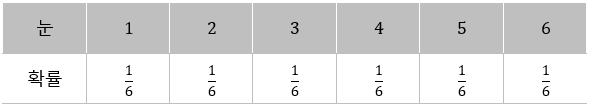

- $X∼A$

- 확률변수의 움직임

- 불공정한 주사위

- 불공정한 주사위의 확률분포?

- 여러 번 굴려기?

- 파이썬 실험

[표 4-2] 불공정한 주사위의 확률분포

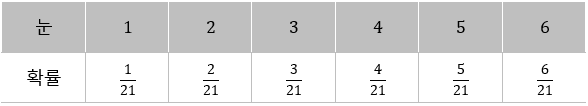

<details><summary></summary>

우리는, 당연히
- 이 주사위가 따르는 표4-2의 확률분포를 전혀 모르고 있고,
- 단지 주사위를 여러번 굴려서 이 확률분포를 추측하려는 것이다.

- 취할 수 있는 값과 그 값이 나오는 확률

In [11]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

- 확률변수 시행

In [12]:
np.random.choice(dice, p=prob)

1

- 다음은 100번

In [13]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
printobj(sample)

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])


 <class 'numpy.ndarray'> 



- 도수분포표 작성

In [14]:
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'frequency' : freq,
              'relative frequency' : freq / num_trial},
             index = pd.Index(range(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


- 히스토그램

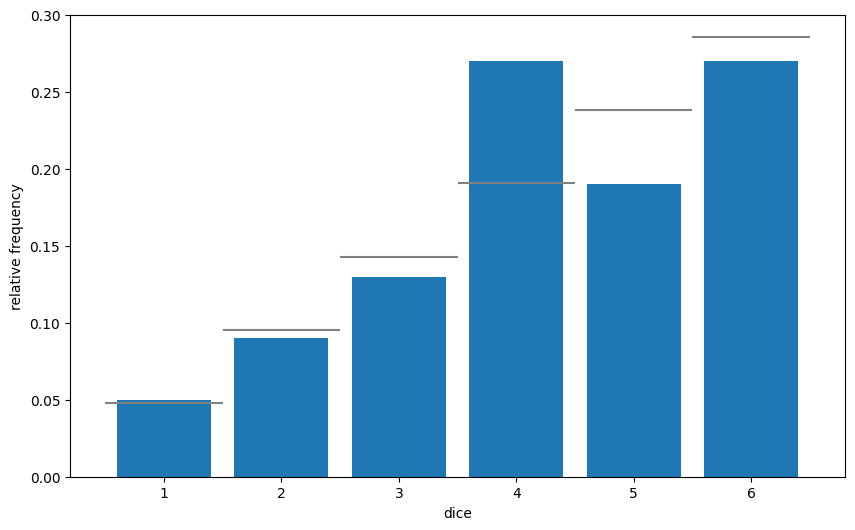

[그림 4-2] 주사위 눈에 대한 히스토그램 (100번 시행)


In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, range(1, 7), range(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(range(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()
print('[그림 4-2] 주사위 눈에 대한 히스토그램 (100번 시행)')

- 실제 확률분포와 상당한 차이

- 10000번 시행

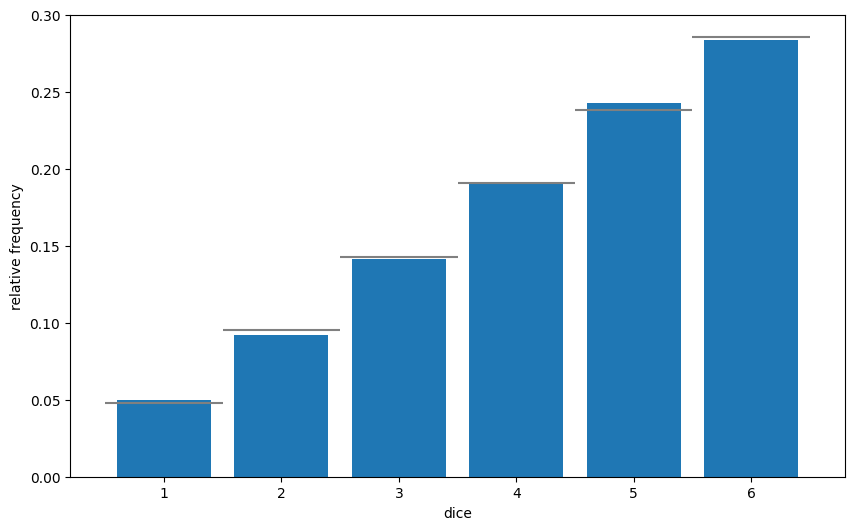

[그림 4-3] 주사위 눈에 대한 히스토그램 (10000번 시행)


In [16]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, range(1, 7), range(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(range(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()
print('[그림 4-3] 주사위 눈에 대한 히스토그램 (10000번 시행)')

- 실제 확률분포에 수렴

### 4-3. 추론통계의 확률

- 주사위의 확률 모형

- 추론통계의 확률 모형

- A 학생 수학 시험의 예

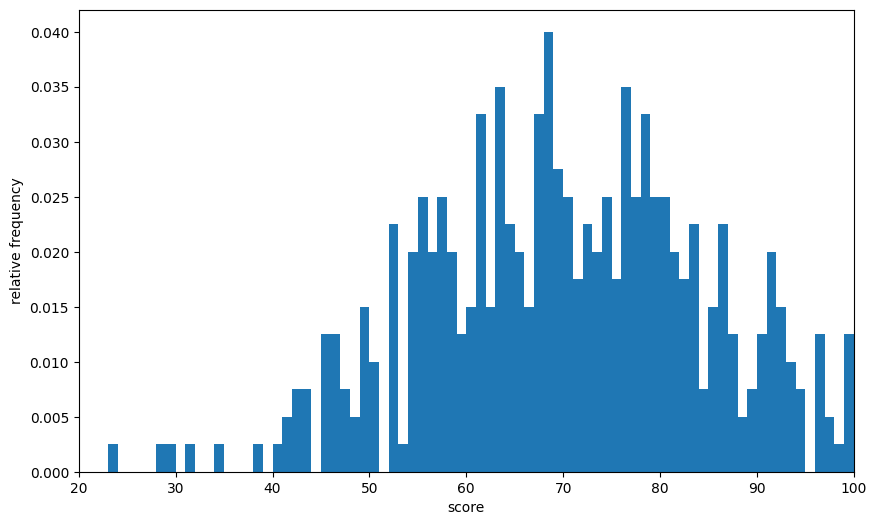

[그림 4-4] 전교생 시험 점수에 대한 히스토그램


In [17]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()
print('[그림 4-4] 전교생 시험 점수에 대한 히스토그램')

- 69점 얻은 학생

- 상대도수는 확률

- 모집단의 확률분포

- 무작위추출

In [18]:
np.random.choice(scores)

89

- 실현값 89점

- 표본 크기가 커지면

- 표본 크기 100 vs 10000

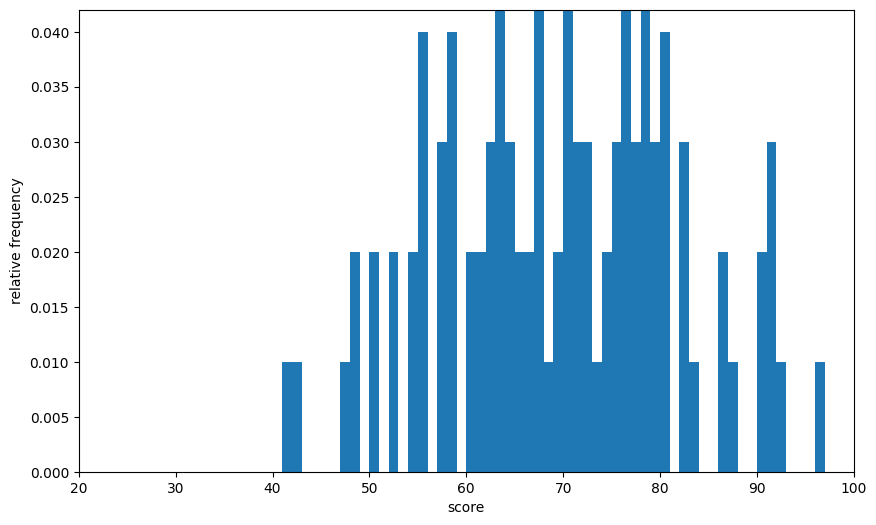

[그림 4-5] 무작위추출로 얻은 표본 데이터의 히스토그램 (표본 크기 = 100)


In [19]:
sample = np.random.choice(scores, 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()
print('[그림 4-5] 무작위추출로 얻은 표본 데이터의 히스토그램 (표본 크기 = 100)')

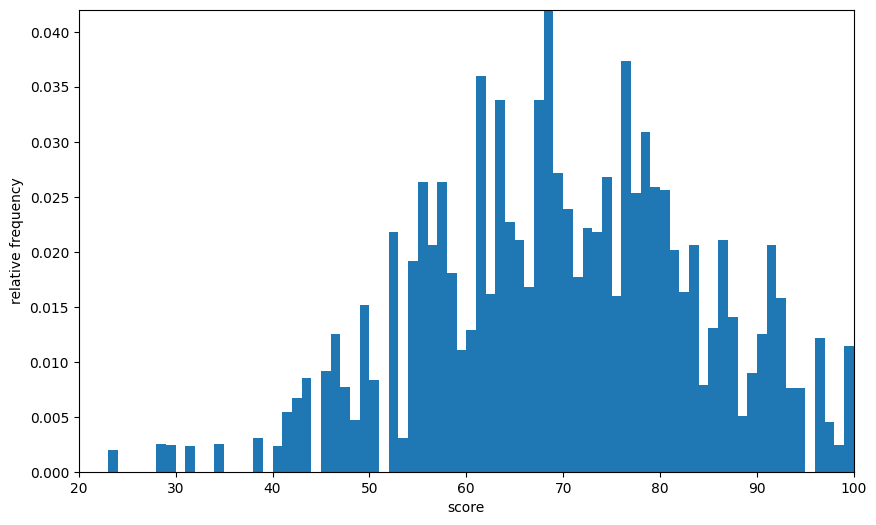

[그림 4-6] 무작위추출로 얻은 표본 데이터의 히스토그램 (표본 크기 = 10000)


In [20]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()
print('[그림 4-6] 무작위추출로 얻은 표본 데이터의 히스토그램 (표본 크기 = 10000)')

- 표본 크기가 커지면 실제 분포에 수렴

- 표본평균

- 무작위추출
  - 크기 20인 표본 추출
  - 표본평균 계산 10000회 수행

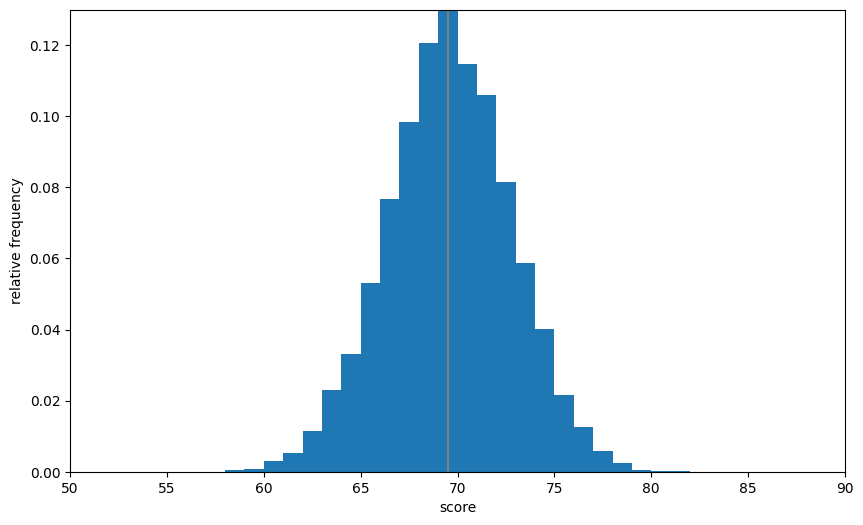

[그림 4-7] 표본평균의 분포


In [21]:
np.random.seed(0)
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()
print('[그림 4-7] 표본평균의 분포')

- 모평균 중심으로 분포